# Loan Default Prediction

## Dataset Overview

The dataset used for this project is from Lending Club.<br>

LendingClub is a peer-to-peer lending company headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, and to offer loan trading on a secondary market. <br>

The full dataset provided consists of over 2 million records and 152 columns from 2007 - 2018, describing characteristics of the loan applicants. These columns include annual income, funded amount, house ownership, experience, state and so on. The loan status column is the target variable. It shows whether the customer was declared 'fully paid' or 'charged off'.<br>

We have extracted data from the years 2013-2018 for the purpose of this project. There is a a severe class imbalance in the data, with the number of defaulters being much less than the non-defaulters. For this reason the majority class was undersampled to create balanced classes.

## Project Outline

To predict whether a loan applicant will default on the loan or not.

## Scope of the notebook

In this notebook, we perform Exploratory Data Analysis to analyze patterns in the data and identify useful predictors for our model.

# Table of Contents

1. **[Import Libraries](#lib)**
2. **[Import Dataset](#import)**
3. **[Exploratory Data Analysis](#EDA)**
4. **[Statistical Tests](#stat)**

<a id="lib"></a>

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('max.column', None)

import plotly.express as px

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report, accuracy_score

In [5]:
# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

<a id="import"></a>

# Import Dataset

In [6]:
# read dataset

df = pd.read_csv('df_2013_2018_balanced.csv')

# create a copy of the original
df_orig = df.copy()

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year
0,93696900,NaN,10000.000000,10000.000000,10000.000000,60 months,21.490000,273.300000,D,D5,NaN,NaN,OWN,36000.000000,Not Verified,2016-11-01,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,737xx,OK,13.500000,0.000000,Aug-1987,660.000000,664.000000,1.000000,77.000000,75.000000,6.000000,1.000000,13247.000000,56.100000,25.000000,w,0.000000,0.000000,12518.777167,12518.780000,10000.000000,2518.780000,0.000000,0.000000,0.000000,Feb-2018,8704.520000,NaN,Jan-2019,664.000000,660.000000,0.000000,NaN,1.000000,Individual,NaN,NaN,NaN,0.000000,0.000000,13247.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,NaN,1.000000,3.000000,6703.000000,56.000000,23600.000000,2.000000,0.000000,2.000000,5.000000,2649.000000,6837.000000,64.000000,0.000000,0.000000,147.000000,351.000000,3.000000,3.000000,3.000000,3.000000,NaN,5.000000,NaN,0.000000,2.000000,4.000000,3.000000,10.000000,6.000000,6.000000,16.000000,4.000000,6.000000,0.000000,0.000000,0.000000,1.000000,95.700000,33.300000,1.000000,0.000000,23600.000000,13247.000000,19000.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000
1,6325886,NaN,12000.000000,12000.000000,12000.000000,36 months,13.680000,408.270000,C,C1,urs corp,8 years,RENT,69000.000000,Not Verified,2013-07-01,1,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,bill consolidate,919xx,CA,8.680000,0.000000,Sep-2003,675.000000,679.000000,1.000000,66.000000,NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508490 entries, 0 to 508489
Columns: 152 entries, id to issue_year
dtypes: float64(115), int64(2), object(35)
memory usage: 589.7+ MB


In [9]:
df.describe(include = object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,508490,508490,508490,472153,473958,508490,508490,508490,508490,508490,23574,508490,500707,508490,508490,508490,508490,506308,508470,508490,11195,8132,508490,4473,4473,4473,4473,4473,4473,4473,508490,508490,32736,32736,32736
unique,2,7,35,155894,11,5,3,72,1,508490,23338,13,14629,920,51,709,2,74,74,2,3,509,1,1,9,2,25,25,25,5,2,2,62,3,68
top,36 months,C,C1,Teacher,10+ years,MORTGAGE,Source Verified,2016-03-01,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,w,Aug-2018,Mar-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,Sep-2017,Dec-2017,Oct-2017,Late (16-30 days),Cash,N,Jan-2019,COMPLETE,Jan-2019
freq,356491,153627,31720,8345,165743,239756,206016,20411,508490,1,9,303049,273905,5469,72708,3570,316436,15659,161080,497228,6297,90,508490,4473,977,2548,939,741,744,2212,505730,475754,2447,14045,1635


In [10]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,issue_year
count,508490.000000,0.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508348.000000,508490.000000,508490.000000,508490.000000,508490.000000,259257.000000,95267.000000,508490.000000,508490.000000,508490.000000,508168.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,0.000000,508490.000000,508490.000000,508490.000000,146028.000000,508490.000000,11262.000000,11262.000000,508490.000000,508490.000000,508490.000000,226434.000000,226434.000000,226434.000000,226434.000000,219973.000000,226434.000000,196515.000000,226434.000000,226434.000000,226434.000000,226412.000000,508490.000000,226434.000000,226434.000000,226434.000000,508490.000000,508479.000000,502905.000000,502603.000000,508490.000000,508490.000000,493170.000000,508490.000000,508490.000000,508490.000000,508490.000000,503272.000000,128784.000000,464020.000000,178943.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,485599.000000,508490.000000,508490.000000,508490.000000,508432.000000,502733.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,508490.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,7950.000000,8132.000000,8132.000000,8132.000000,8132.000000,3100.000000,4473.000000,4473.000000,4473.000000,4473.000000,2548.000000,4473.000000,4473.000000,32736.000000,32736.000000,32736.000000,508490.000000
mean,61559971.470088,NaN,14975.210820,14975.210771,14969.259759,14.186820,452.091880,74606.110336,0.500000,19.195270,0.341045,692.335611,696.335731,0.686916,34.001277,70.565736,11.817558,0.239330,16037.594838,52.726116,25.032069,0.000000,0.000000,12426.973748,12422.057486,9323.188197,2487.291787,2.770903,613.722860,103.892965,3680.092064,NaN,635.731889,601.618911,0.020478,43.569096,1.000000,113376.821256,19.681809,0.005567,243.181655,133181.687166,1.104799,2.808735,0.807600,1.792196,19.23543

In [11]:
df.isnull().sum().sort_values(ascending=False)[:10]/len(df)

member_id                                    1.000000
next_pymnt_d                                 1.000000
orig_projected_additional_accrued_interest   0.994989
sec_app_mths_since_last_major_derog          0.993904
hardship_start_date                          0.991203
hardship_reason                              0.991203
hardship_amount                              0.991203
hardship_type                                0.991203
hardship_end_date                            0.991203
payment_plan_start_date                      0.991203
dtype: float64

There are a lot of null values in the dataset

# Data Preparation

In [12]:
# We keep only columns with information that would be available to investors at the time of application for the loan 
# and those columns that are useful based on domain understanding 

cols_to_keep = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 
                 'grade', 'home_ownership', 'id', 'initial_list_status', 
                 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status','last_fico_range_high','last_fico_range_low', 'mort_acc', 'open_acc', 'pub_rec', 
                 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'inq_last_6mths',
                 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
               'issue_year', 'chargeoff_within_12_mths', 'delinq_2yrs']

In [13]:
df = df[cols_to_keep].copy()

In [14]:
# drop the id column

df.drop('id',axis = 1, inplace = True)

<a id="EDA"></a>

# Exploratory Data Analysis

## Univariate

### Numeric variables

In [15]:
# storing all numeric columns

num_cols = df.select_dtypes(np.number).columns
num_cols[0:17]

Index(['annual_inc', 'dti', 'installment', 'int_rate', 'loan_amnt',
       'loan_status', 'last_fico_range_high', 'last_fico_range_low',
       'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'inq_last_6mths', 'total_acc', 'issue_year'],
      dtype='object')

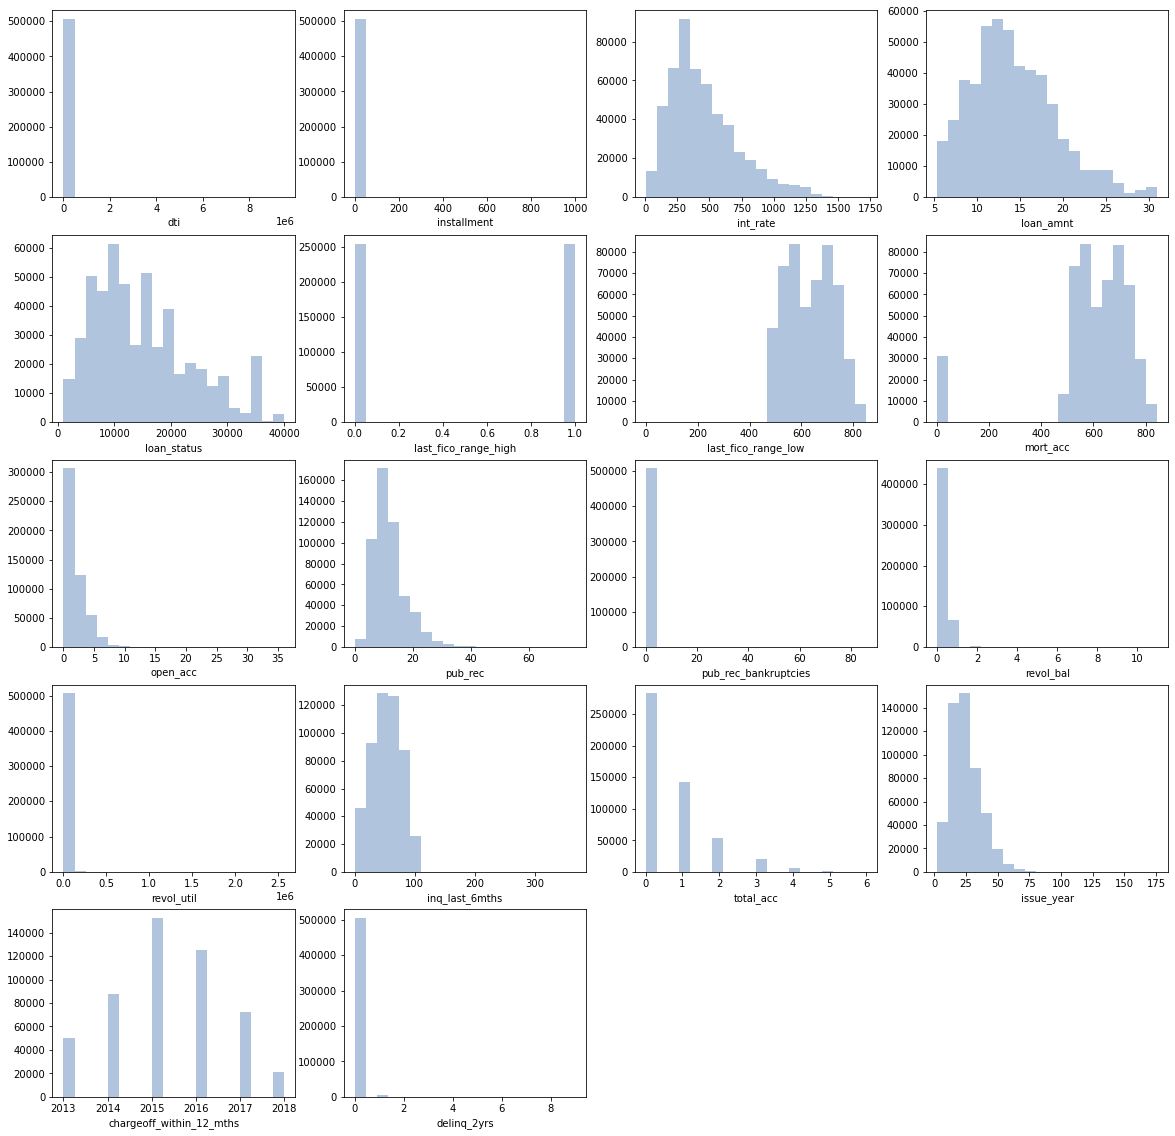

In [16]:
# plotting histograms of numeric variables

plt.figure(figsize = (20,20))

for i in range(1,len(num_cols)):
    plt.subplot(5,4,i)
    plt.hist(df[num_cols[i-1]],color = "lightsteelblue", bins = 20)
    plt.xlabel(num_cols[i])

The following features appear strongly right-skewed: funded_amount, funded_amount_inv, int_rate, installment, annual_inc, loan_amnt, pub_rec

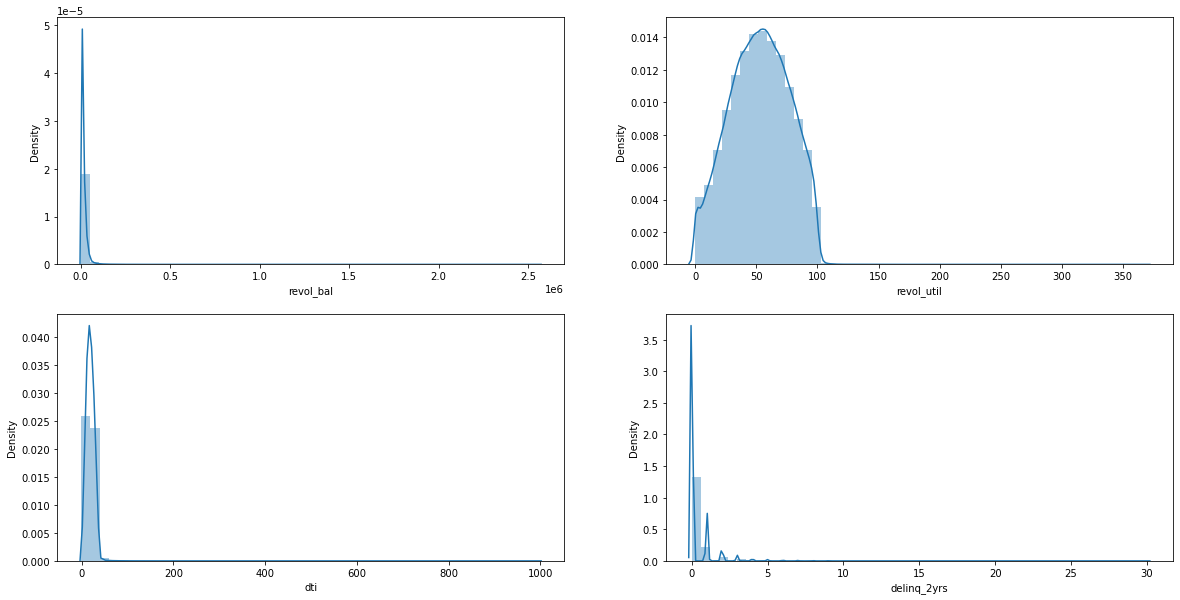

In [17]:
# certain distributions appear right skewed with extreme outliers 
# we can plot them separately 
plt.figure(figsize = (20,10))

cols_to_plot = ['revol_bal','revol_util','dti','delinq_2yrs']

for i in range(4):
    plt.subplot(2,2,i+1)
    sns.distplot(df[cols_to_plot[i]])

# Outliers

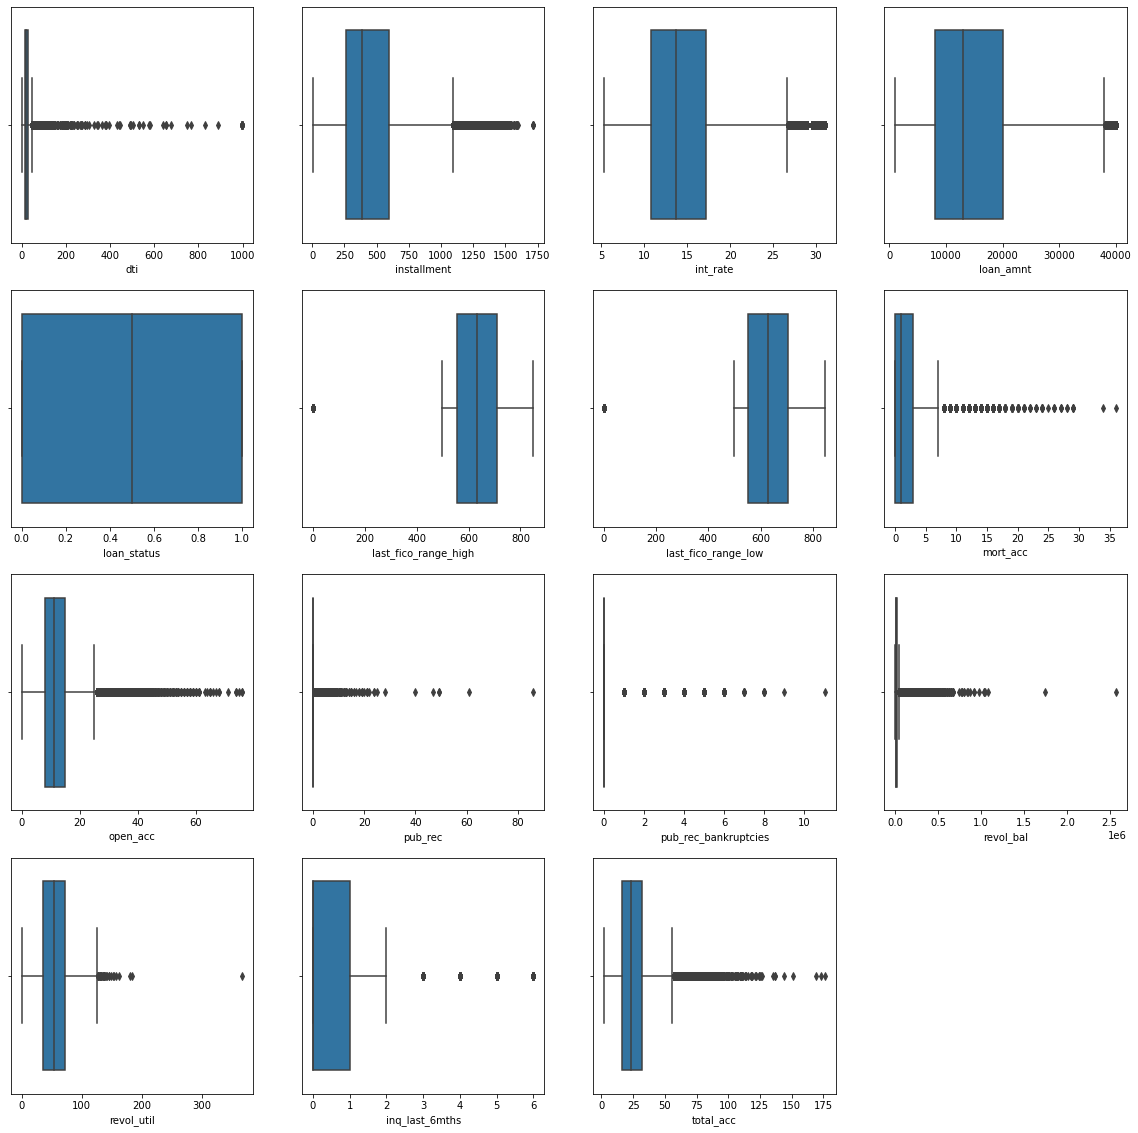

In [19]:
# plotting boxplot of numeric variables

plt.figure(figsize = (20,20))

num_cols_1 = num_cols[1:17]

for i in range(1,len(num_cols_1)):
    plt.subplot(4,4,i)
    sns.boxplot(df[num_cols_1[i-1]])

There are outliers in the data.

### Categorical Univariate

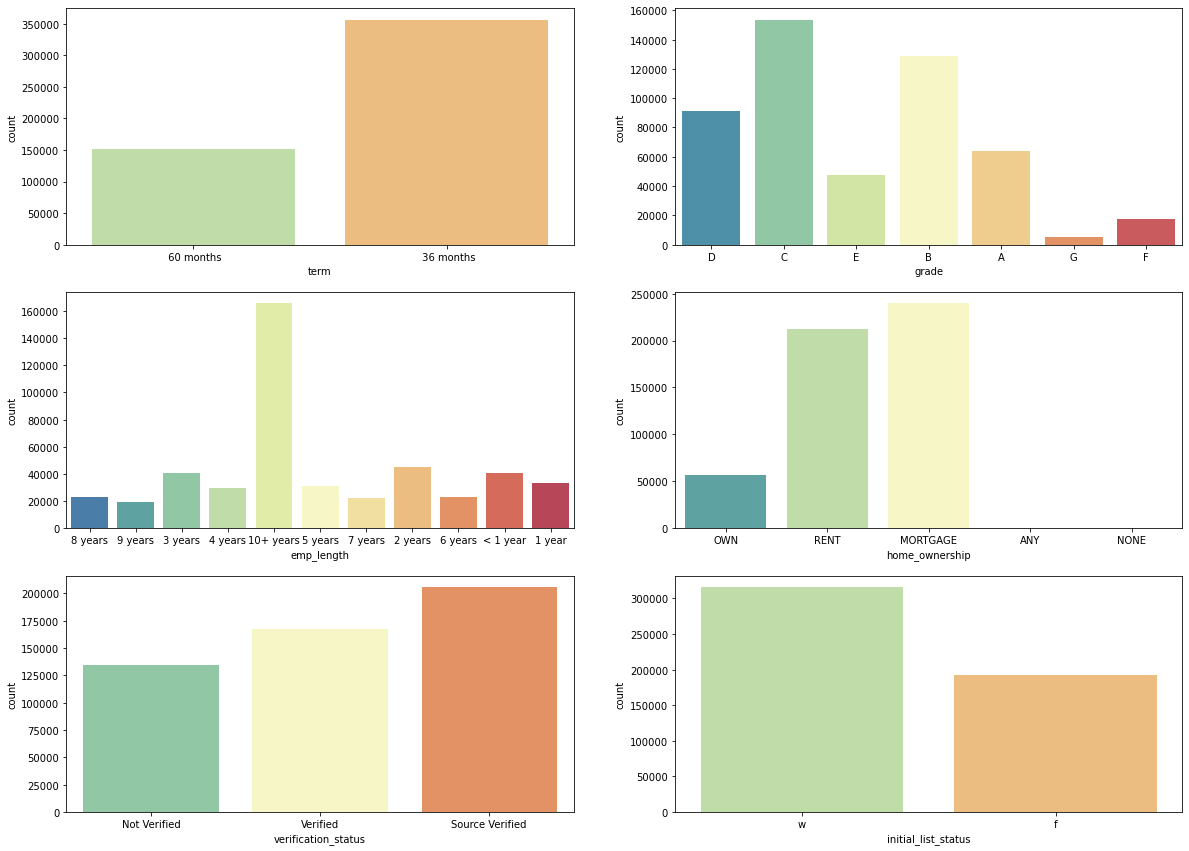

In [20]:
# analysing unqiue values and their counts in categorical variables

plt.figure(figsize = (20,20))

cat_cols_1 = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
              'initial_list_status','issue_d']

for i in range(1,len(cat_cols_1)):
    plt.subplot(4,2,i)
    sns.countplot(df[cat_cols_1[i-1]],palette = 'Spectral_r')

From the plot we can draw the following insights:
Majority of the applicants have mortgaged homes.
Most applicants have 10+ years of work experience.
Most loans are taken for 36 month term.
Most loan applicants are given 'Wait' as the initial list status.

<AxesSubplot:xlabel='purpose', ylabel='count'>

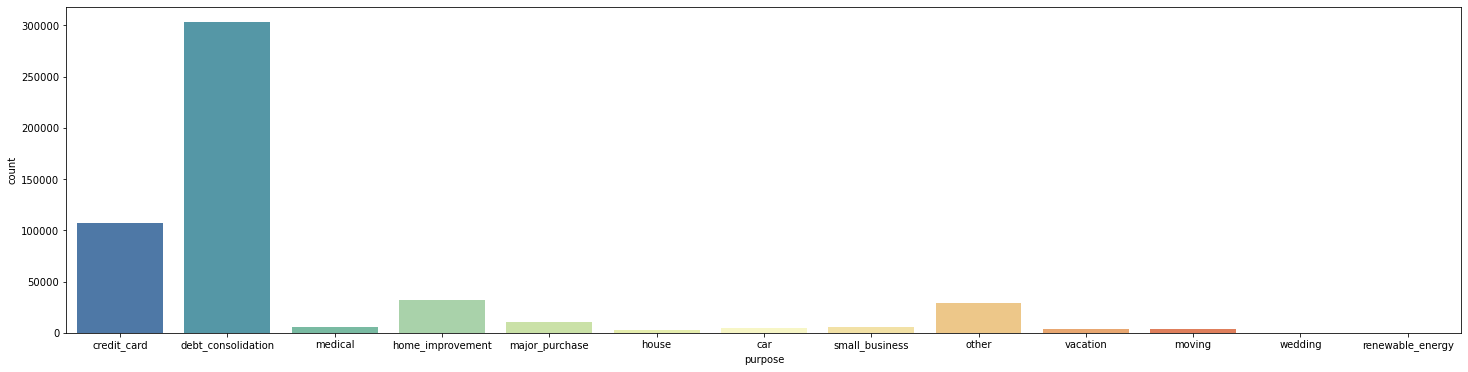

In [21]:
plt.figure(figsize = (25,6))

sns.countplot(df['purpose'],palette = 'Spectral_r')

The most common purpose for loan is debt consolidation, followed by credit card

<AxesSubplot:xlabel='addr_state', ylabel='count'>

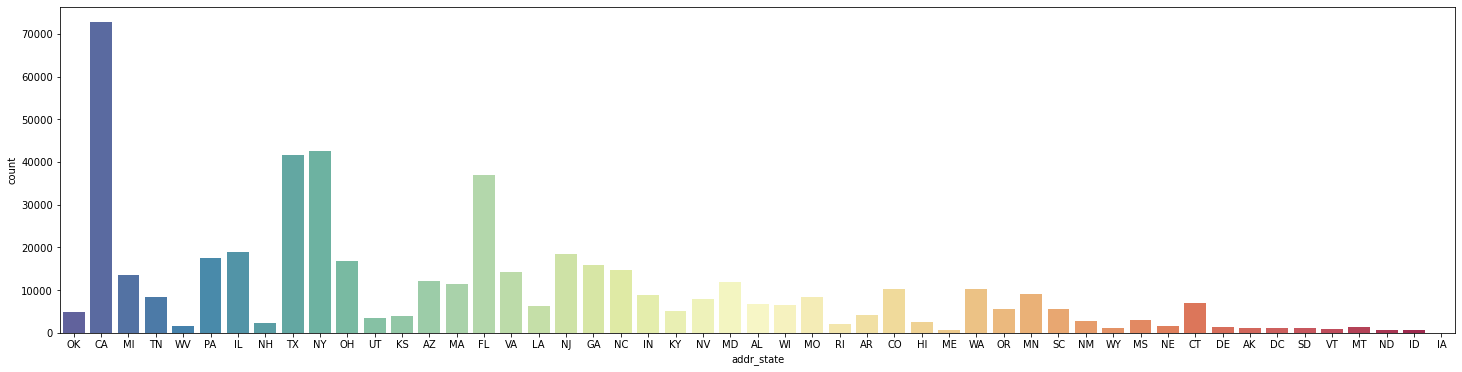

In [22]:
plt.figure(figsize = (25,6))

sns.countplot(df['addr_state'],palette = 'Spectral_r')

Maximum observations are from california.

## Target variable

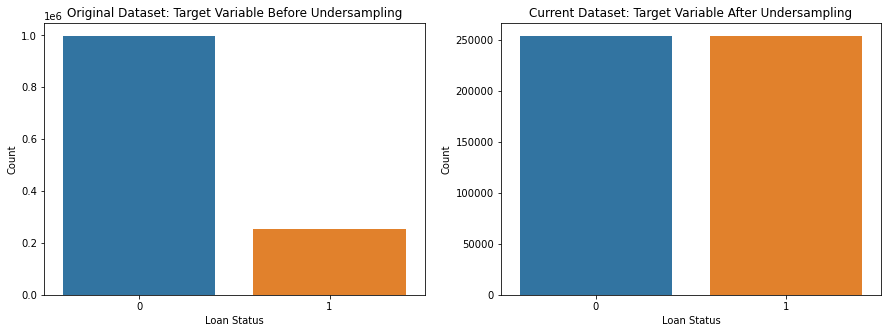

In [20]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)

sns.barplot(x = [0,1],y = [997912, 254245])

plt.title('Original Dataset: Target Variable Before Undersampling')

plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.subplot(1,2,2)

sns.countplot(df['loan_status'])

plt.title('Current Dataset: Target Variable After Undersampling')

plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.show()

After undersampling the majority class, the target variable is now balanced.

## Analyzing relationship between target and numeric variables

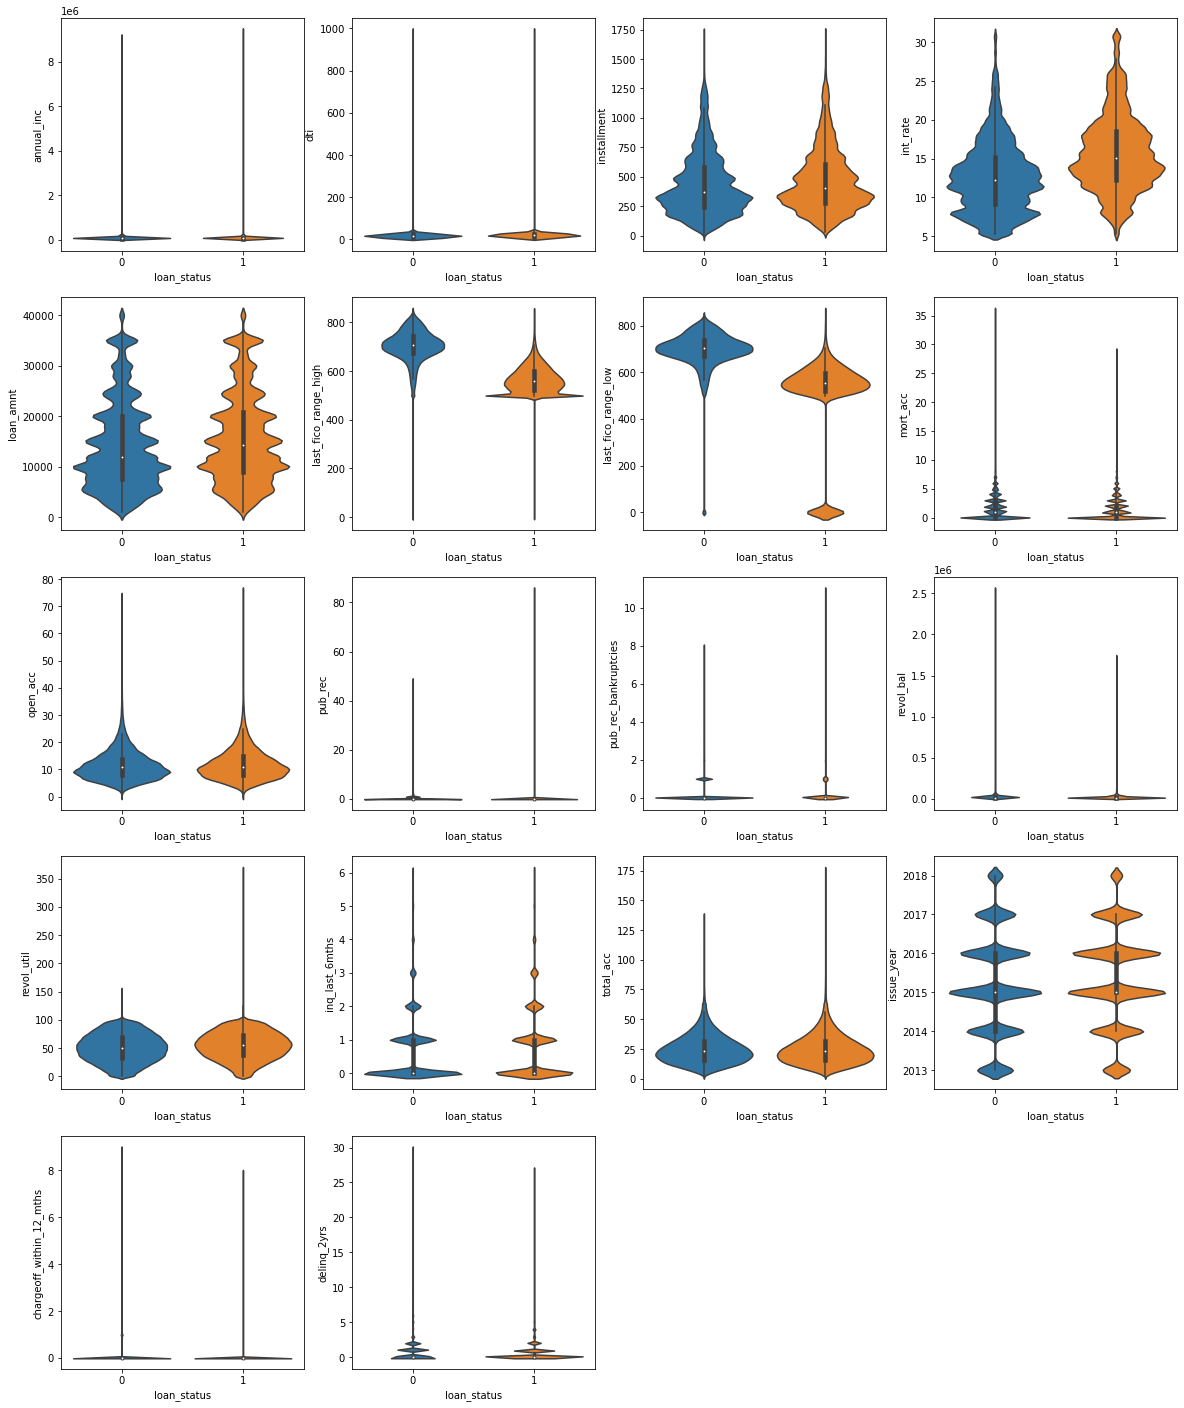

In [27]:
plt.figure(figsize = (20,30))

num_cols_1 = num_cols.drop('loan_status')

for i in range(1,len(num_cols_1)+1):
    plt.subplot(6,4,i)
    sns.violinplot(x=df['loan_status'],y= df[num_cols_1[i-1]])

plt.show()

 Most distributions are right skewed. The plots indicate that there are outliers in most of the features. Also the plots look similar for loan status Fully paid and Charged-off.
 
We can also notice that there are greater proportion of people with higher interest rates in charged-off when compared to fully paid. Median loan amount is higher for loan defaulters.

## Analyzing relationships between independent variables

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

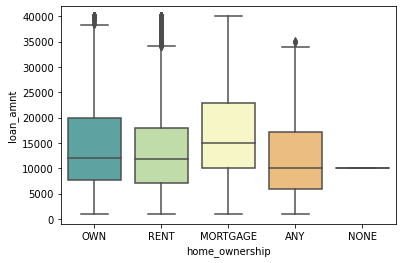

In [28]:
# Does home ownership affect Loan Amount 

sns.boxplot(data = df, x = 'home_ownership', y = 'loan_amnt',palette = 'Spectral_r')

There is a slight variation in the medians. Mortgage has the highest median loan_amount compared to other categories.

In [29]:
# Is home ownership related to verification status (Do people with verified sources of income tend to own homes?) 

pd.crosstab(df['verification_status'], df['home_ownership'], normalize='columns')

home_ownership,ANY,MORTGAGE,NONE,OWN,RENT
verification_status,,,,,
Not Verified,0.339130,0.277378,0.000000,0.267898,0.249991
Source Verified,0.382609,0.382685,1.000000,0.415955,0.427677
Verified,0.278261,0.339937,0.000000,0.316147,0.322332


<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

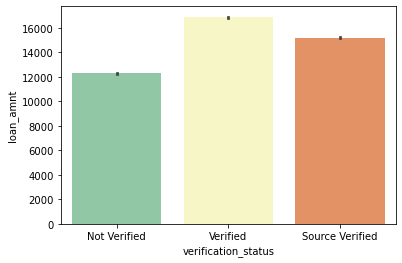

In [32]:
# Does verification status affect loan amount 

sns.barplot(data = df, x = 'verification_status', y = 'loan_amnt',palette = 'Spectral_r')

The average loan amount is higher for those with verified income.

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

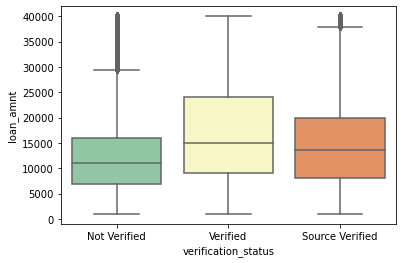

In [33]:
sns.boxplot(data = df, x = 'verification_status', y = 'loan_amnt', palette = 'Spectral_r')

<AxesSubplot:xlabel='dti', ylabel='loan_amnt'>

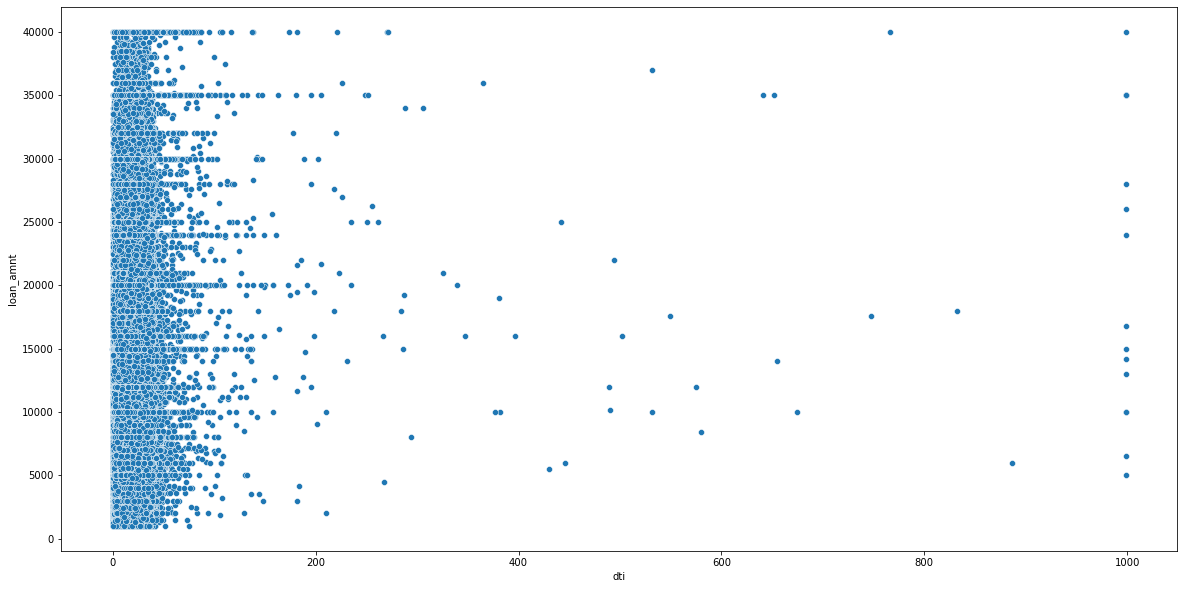

In [34]:
# Debt to Income vs Loan amount (Were people with high DTI given lower loan amounts?) 

plt.figure(figsize = (20,10))

sns.scatterplot(x = df['dti'], y = df['loan_amnt'])

There does not seem to be any relation between dti and loan amount.
There are outliers in the plot with very high dti and loan amount.

In [ ]:
## Average Loan amounts provided per state

<img src="avg_loan_amnt.png">

Alaska has the highest average loan amount. Otherwise there does not appear to be significant variation among the states. Iowa has the lowest loan amount. 

<AxesSubplot:xlabel='addr_state', ylabel='home_ownership'>

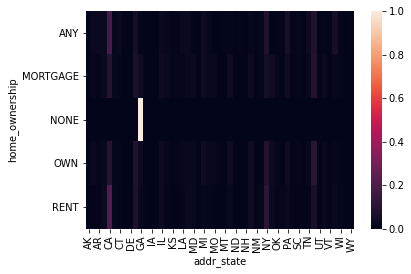

In [37]:
# Home ownership proportion per state

sns.heatmap(pd.crosstab(df['home_ownership'],df['addr_state'], normalize='index'))

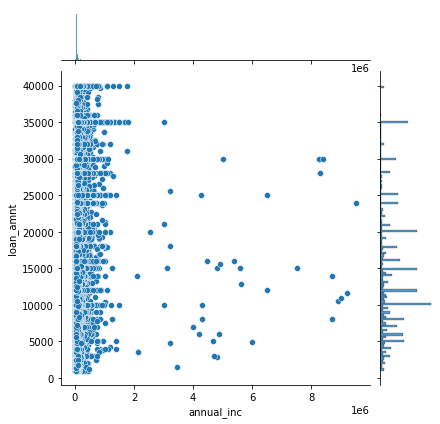

In [38]:
# Income vs loan amt

sns.jointplot(x = df['annual_inc'], y = df['loan_amnt'])

plt.ticklabel_format(style='plain')

There does not seem to be any relation between annual income and loan amount. There are outliers in the plot with very high funded amount and annual income.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

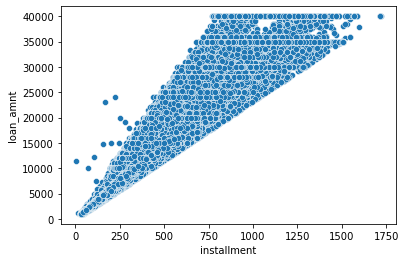

In [39]:
# is the number of installments related to loan amount 

sns.scatterplot(df.installment,df.loan_amnt)

The scatterplot shows a positive linear relationship.

In [40]:
##Charged off vs State

x = df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values(ascending=False)
df_state = x.to_frame(name='charged_off_ratio')

<img src="charged_off.png">

#### Mississippi has highest pct of charged off. Iowa has very few records out of which all are charged off. Therefore it has the highest percentage.

In [42]:
## Loan status vs No. of mortgage accounts

df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,254245.000000,1.756027,2.030689,0.000000,0.000000,1.000000,3.000000,36.000000
1,254245.000000,1.369018,1.818726,0.000000,0.000000,1.000000,2.000000,29.000000


#### Ppl who pay off their loans are more likely to have mortgage accounts

In [43]:
df.groupby('pub_rec_bankruptcies')['loan_status'].value_counts()

pub_rec_bankruptcies  loan_status
0.000000              0              221747
                      1              216886
1.000000              1               34912
                      0               30572
2.000000              1                1921
                      0                1514
3.000000              1                 358
                      0                 309
4.000000              1                 110
                      0                  65
5.000000              1                  32
                      0                  23
6.000000              1                  16
                      0                  11
7.000000              1                   4
                      0                   2
8.000000              1                   4
                      0                   2
9.000000              1                   1
11.000000             1                   1
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

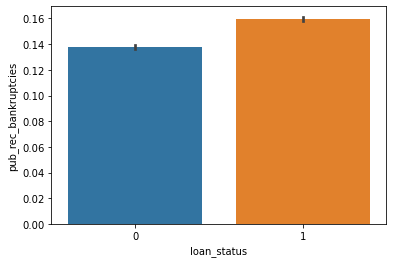

In [44]:
## pub_rec_bankruptices vs loan status

sns.barplot(data = df, y = 'pub_rec_bankruptcies', x = 'loan_status')

#### Ppl with higher number of pub_rec_bankruptices records are more likely to be charged off

In [45]:
## DTI vs state

x = df.groupby('addr_state')['dti'].mean().sort_values(ascending=False)

df_dti = x.to_frame()

<img src="dti.png">

#### Idaho state has highest DTI ratio

Text(0, 0.5, 'number of open accounts')

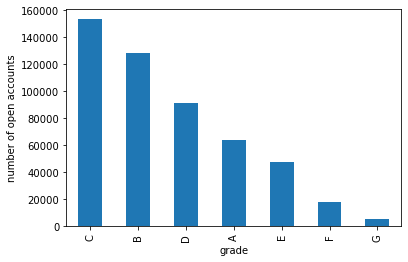

In [14]:
## Count of open credit lines(open_acc) by Grade

df.groupby('grade')['open_acc'].count().sort_values(ascending=False).plot(kind='bar')

plt.ylabel('number of open accounts')

#### So grade C has highest number of open credit lines in the borrower's credit file.

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

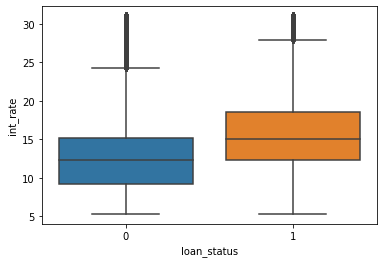

In [48]:
## loan status vs int_rate

sns.boxplot(x='loan_status',y='int_rate',data=df)

#### Charged off has higher interest rates as compared to full paid loan status

<AxesSubplot:xlabel='term', ylabel='int_rate'>

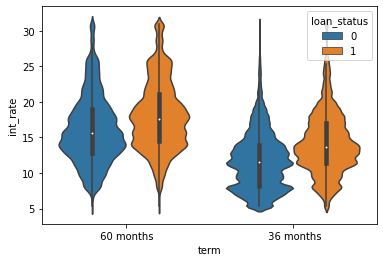

In [49]:
## Term vs int_rate vs status

sns.violinplot(x='term',y='int_rate',hue='loan_status',data=df)

#### More people have higher interest rates for the 60 month term for loan when compared to 36 month term.

In [50]:
## Derogatory public records vs loan status

pd.crosstab(df['pub_rec'], df['loan_status'])

loan_status,0,1
pub_rec,,
0.000000,210058,203165
1.000000,37016,42402
2.000000,4719,5760
3.000000,1423,1680
4.000000,513,650
5.000000,233,279
6.000000,138,154
7.000000,55,59
8.000000,32,28


<AxesSubplot:xlabel='purpose'>

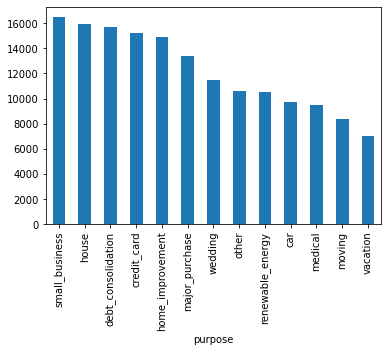

In [51]:
## Purpose vs loan amt

df.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False).plot(kind='bar')

#### Avg loan amount is higher of categories like small_business,house..

## Analysing relationship between target variable and categorical variables

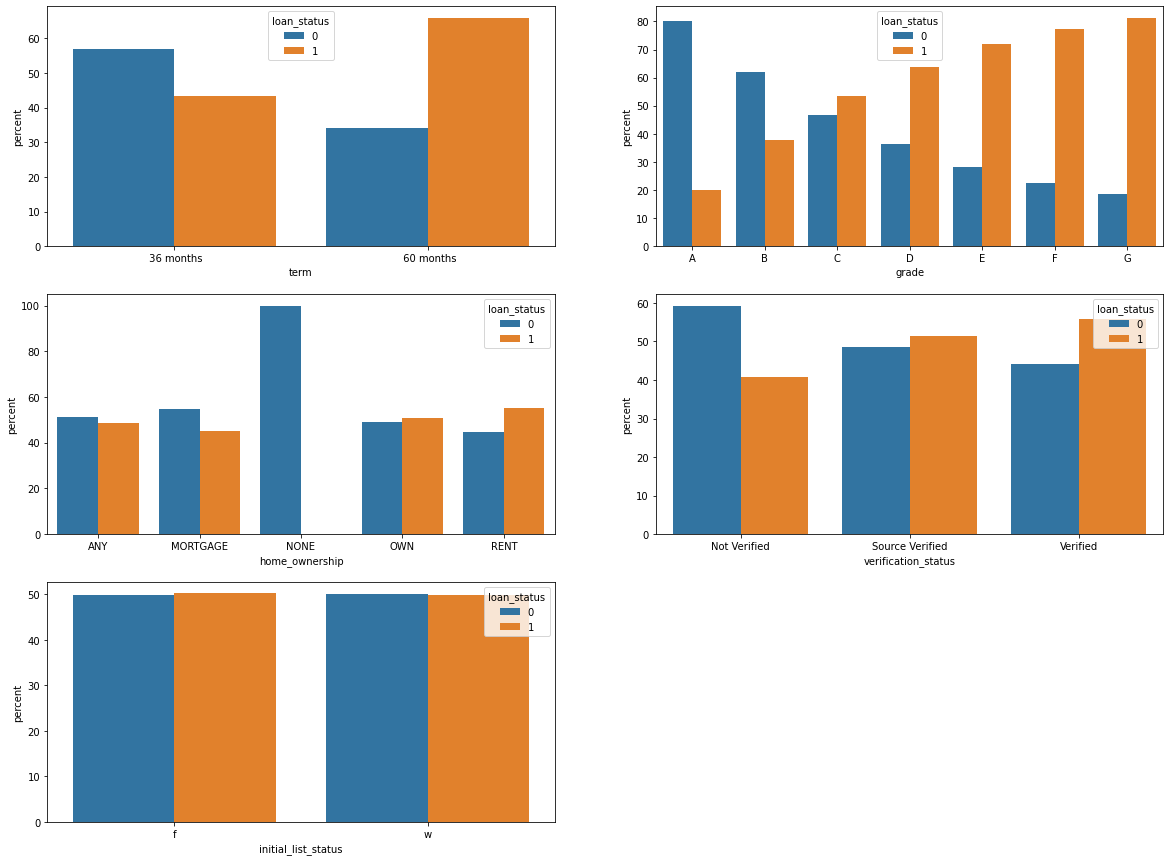

In [52]:
cols = ['term','grade','home_ownership','verification_status','initial_list_status']

plt.figure(figsize = (20,15))

for i in range(1,len(cols)+1):    
    plt.subplot(3,2,i)
    df1 = df.groupby(cols[i-1])['loan_status'].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    sns.barplot(data=df1,x = df1.columns[0],y='percent',hue='loan_status')

#### Most of the fully paid loans are for term 36 months. Higher ratio between charged of and fully paid for the 60 month term.
#### Grade G has highest charged off count

<AxesSubplot:xlabel='emp_length', ylabel='count'>

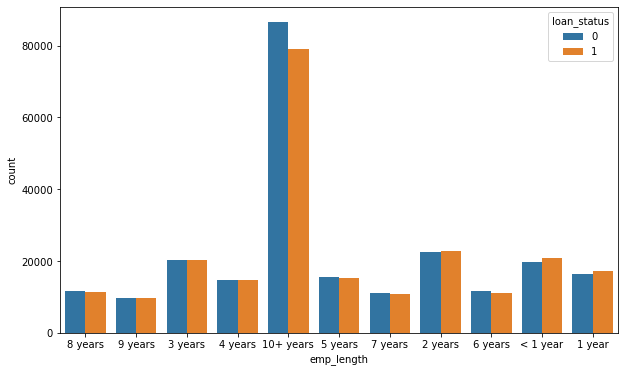

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='emp_length', hue='loan_status')

#### Emp length of 10+years has the greatest difference between charged off and fully paid.

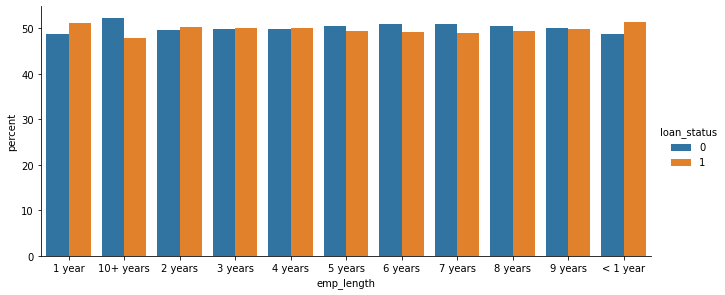

In [54]:
x,y = 'emp_length', 'loan_status'
           
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1, height=4, aspect=18.7/8.27)

#### Percentage of Fully paid vs Charged off more or less remains the same across all emp length

<AxesSubplot:xlabel='purpose', ylabel='count'>

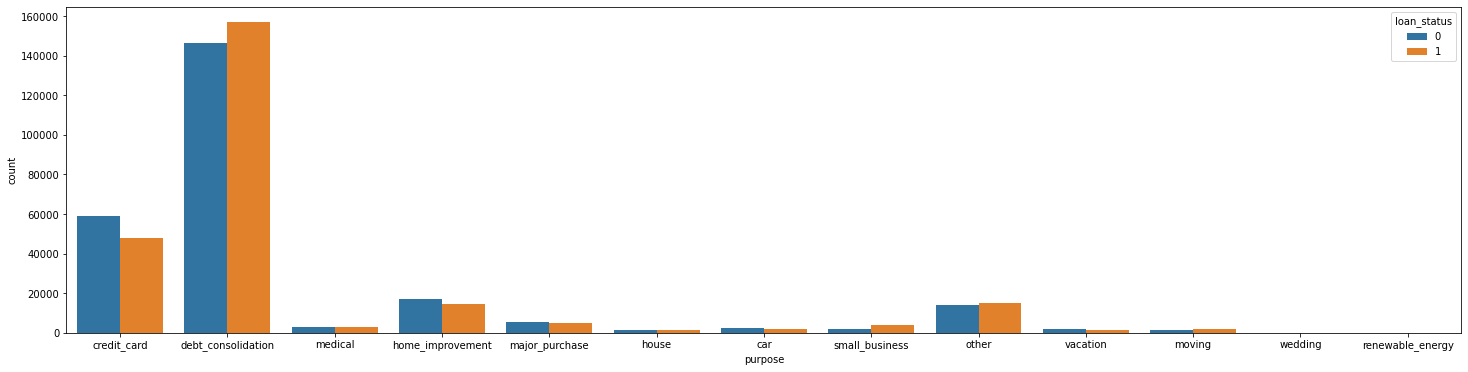

In [55]:
plt.figure(figsize=(25,6))
sns.countplot(data=df, x='purpose', hue='loan_status')

#### Most of the loans were fully paid with the purpose which they were granted being Debt_consolidation

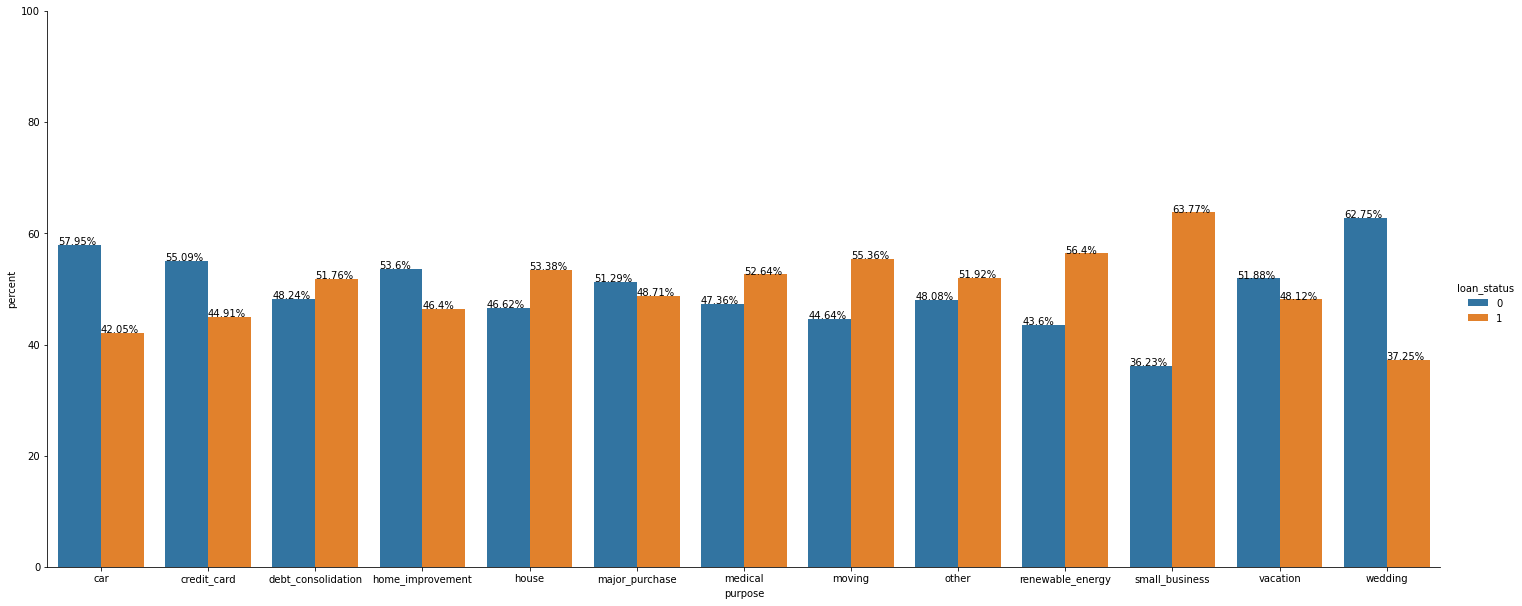

In [56]:
x,y = 'purpose', 'loan_status'
           
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1, height=8.27, aspect=20/8.27)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [57]:
df_2 = df_orig.copy()

df_2['issue_d'] = pd.to_datetime(df_2['issue_d'])

In [58]:
df_2['issue_month'] = df_2['issue_d'].dt.month
df_2['issue_year'] = df_2['issue_d'].dt.year

<AxesSubplot:xlabel='issue_month', ylabel='count'>

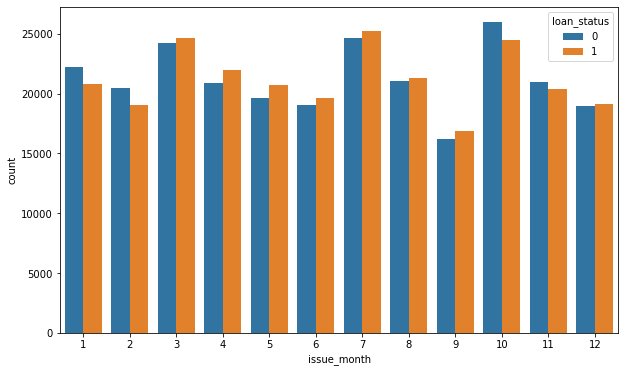

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_2, x='issue_month', hue='loan_status')

#### October has the highest issue of fully paid loans

#### The proportion of people in both categories of loan status is alomst the same for all issue months. 

<AxesSubplot:xlabel='issue_year', ylabel='count'>

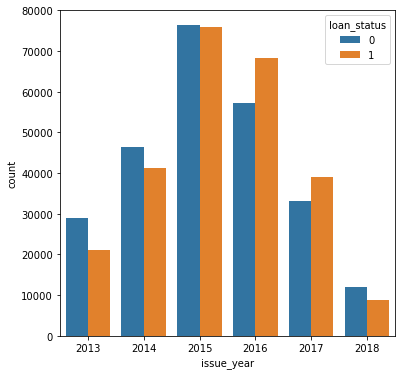

In [60]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_2, x='issue_year', hue='loan_status')

#### Year 2015 has highest number of full paid loans and Charged off loans as comapared to rest of the years

<AxesSubplot:xlabel='issue_year', ylabel='count'>

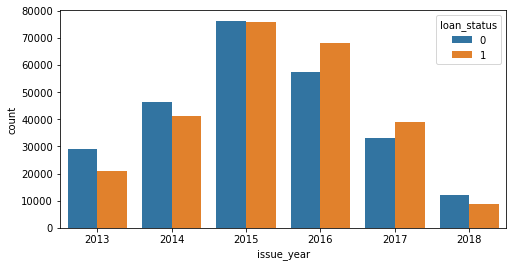

In [61]:
plt.figure(figsize = (8,4))

sns.countplot(data = df_2, x = 'issue_year', hue = 'loan_status')

#### We see that the count of people who have fully paid the loan is lower than charged off for the years 2016 and 2017.

<a id="stat"></a>

# Statistical Tests

### Is the mean annual income significantly different for defaulters and non-defaulters?

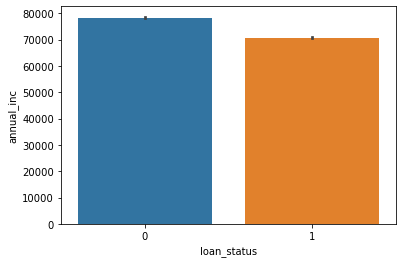

In [62]:
sns.barplot(data = df , x = 'loan_status', y = 'annual_inc')

plt.show()

In [63]:
# Check if the data is normal

stats.shapiro(df['annual_inc'])

ShapiroResult(statistic=0.3735272288322449, pvalue=0.0)

In [64]:
# pvalue < 0.05 , we can reject H0
# The data is not normal so we opt for Mann-Whitney U

In [65]:
# Mann-Whitney U Test

# H0: Both distibutions come from the same population
# H1: Both distibutions do not come from the same population

# significance level (alpha) = 0.05

x = df[df['loan_status']==0]['annual_inc']
y = df[df['loan_status']==1]['annual_inc']

stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=35547299542.5, pvalue=0.0)

In [66]:
# since pvalue < alpha, we reject H0
# We conclude that the two distibutions do not come from the same population
# The distribution of annual income is different for defaulters and non defaulters

### Is the average interest rate significantly different for defaulters and non-defaulters?

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

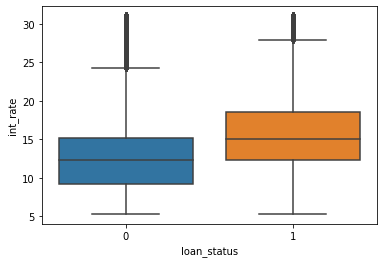

In [67]:
sns.boxplot(x='loan_status',y='int_rate',data=df)

In [68]:
# Check if the data is normal

# H0: The data is normal
# H1: The data is not normal

stats.shapiro(df['int_rate'])

ShapiroResult(statistic=0.9718236327171326, pvalue=0.0)

In [69]:
# pvalue < 0.05 , we can reject H0
# The data is not normal so we opt for Mann-Whitney U

In [70]:
# Mann-Whitney U Test

# H0: Both distibutions come from the same population
# H1: Both distibutions do not come from the same population

# significance level (alpha) = 0.05

x = df[df['loan_status']==0]['int_rate']
y = df[df['loan_status']==1]['int_rate']

stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=20330889390.5, pvalue=0.0)

In [71]:
# since pvalue < alpha, we reject H0
# We conclude that the two distibutions do not come from the same population
# The distribution of interest rate is significantly different for defaulters and non defaulters

### Is loan amount statistically significant for different categories of Home Ownership?

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

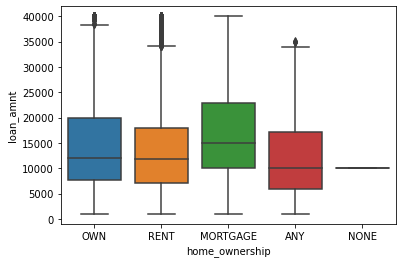

In [72]:
sns.boxplot(data = df, x = 'home_ownership', y = 'loan_amnt')

In [73]:
# Check if the data is normal

# H0: The data is normal
# H1: The data is not normal

# significance level (alpha) = 0.05

stats.shapiro(df['loan_amnt'])

ShapiroResult(statistic=0.9428123235702515, pvalue=0.0)

In [74]:
# pvalue < 0.05 , we can reject H0
# The data is not normal so we opt for Kruskal Wallis test

In [75]:
# H0 : The medians of all groups are equal
# H1: At least one median is significantly different from the other

x1 = df[df['home_ownership']=='RENT']['loan_amnt']
x2 = df[df['home_ownership']=='OWN']['loan_amnt']
x3 = df[df['home_ownership']=='MORTGAGE']['loan_amnt']
x4 = df[df['home_ownership']=='ANY']['loan_amnt']

stats.kruskal(x1,x2,x3,x4)

KruskalResult(statistic=15575.481858150444, pvalue=0.0)

In [76]:
# pvalue < 0.05 , we can reject H0
# We infer that at least at least one median is significantly different from the other

### Is Loan Status dependent on Grade?

In [77]:
# H0: Loan status and grade are independent
# H1: Loan status and grade are not independent

# significance level (alpha) = 0.05

c = pd.crosstab(df['loan_status'], df['grade'])
c

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,51328,79761,71519,33144,13471,4019,1003
1,12810,48736,82108,58205,34332,13703,4351


In [78]:
# All cell values are greater than 5, so our assumptions are satisfied

In [79]:
chi_stat = stats.chi2_contingency(c)[0]
pvalue = stats.chi2_contingency(c)[1]
print('Test statistic:', chi_stat)
print('pvalue:', pvalue)

Test statistic: 54716.92084509631
pvalue: 0.0


In [80]:
# pvalue < 0.05, 
# so we reject H0
# We have significant evidence to suggest that Loan status and grade are not independent

### Is Loan Status dependent on Home Ownership?

In [81]:
# H0: Loan status and grade are independent
# H1: Loan status and grade are not independent

# significance level (alpha) = 0.05

c2 = pd.crosstab(df['loan_status'], df['home_ownership'])
c2

home_ownership,ANY,MORTGAGE,NONE,OWN,RENT
loan_status,,,,,
0,59,131328,1,27754,95103
1,56,108428,0,28704,117057


In [82]:
chi_stat = stats.chi2_contingency(c2)[0]
pvalue = stats.chi2_contingency(c2)[1]
print('Test statistic:', chi_stat)
print('pvalue:', pvalue)

Test statistic: 4476.096119585622
pvalue: 0.0


In [83]:
# pvalue < 0.05, 
# so we reject H0
# We have significant evidence to suggest that Loan status and Home Ownership are not independent

### Is the median no. of public records significantly different for defaulters and non-defaulters?

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

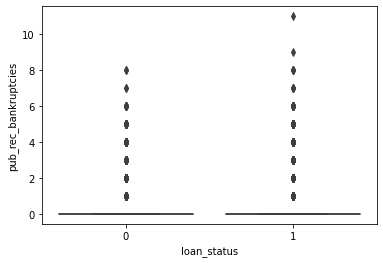

In [84]:
sns.boxplot(x='loan_status',y='pub_rec_bankruptcies',data=df)

In [85]:
stats.shapiro(df['pub_rec_bankruptcies'])

ShapiroResult(statistic=0.4040883779525757, pvalue=0.0)

As p-value is less than 0.05, we reject H0 and conclude that data is not normally distributed. So we perform MannWhitneyU

In [86]:
# H0: Both distibutions come from the same population
# H1: Both distibutions do not come from the same population

stats.mannwhitneyu(df['pub_rec_bankruptcies'],df['loan_status'])

MannwhitneyuResult(statistic=82957219682.5, pvalue=0.0)

As p-value is less than 0.05, we reject H0 and conclude that 2 samples are drawn from different distributions

## Is the median revol_bal significantly different for defaulters and non-defaulters?

<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

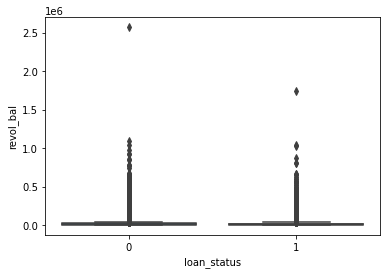

In [87]:
sns.boxplot(x='loan_status',y='revol_bal',data=df)

In [88]:
stats.shapiro(df['revol_bal'])

ShapiroResult(statistic=0.48176175355911255, pvalue=0.0)

As p-value is less than 0.05, we reject H0 and conclude that data is not normally distributed